# Notebook 02: Regression Model

**Student Name:** Brodie Ellis

**Dataset:** Airbnb New York City 2019

**Target Variable:** price

**Checkpoint 3 Due:** Feb 15

---

## Rules & Integrity

1. **NO AI TOOLS**: You may **NOT** use ChatGPT, Claude, Gemini, GitHub Copilot, or any other AI assistant to generate code for this assignment. The goal is to build *your* fundamental skills. If you rely on AI now, the advanced topics later will be impossible.

2. **Study Groups Encouraged**: You **ARE** encouraged to discuss ideas, share approaches, and explain concepts to your study group peers. Teaching others is the best way to learn! However, the code you submit must be **your own work**.

3. **Use Your Resources**: You are free to use Google, StackOverflow, Pandas/Scikit-learn documentation, and your class notes.

4. **Comment Your Code**: Include comments explaining *why* you're doing what you're doing. I want to see your thought process.

5. **Resubmission**: You may submit this assignment multiple times for feedback before the checkpoint deadline.

---

## Important: Written Reflections

Throughout this notebook, you'll be asked to interpret results, justify decisions, and explain your reasoning. **These written reflections are a critical part of your grade.**

Good data scientists don't just run code—they communicate their findings clearly. Take time to write thoughtful, complete responses to all reflection prompts. This demonstrates your understanding and prepares you for real-world stakeholder communication.

---

## Setup

In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn - preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Sklearn - models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Sklearn - evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model saving
import joblib

# Settings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


## Section 1: Load Processed Data

In [2]:
# Load cleaned data from previous notebook
df = pd.read_csv('../data/processed/cleaned_data.csv')

print(f"Data shape: {df.shape}")
df.head()

Data shape: (45191, 14)


,price,minimum_nights,reviews_per_month,calculated_host_listings_count,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Private room,room_type_Shared room,availability_ratio,has_reviews,log_reviews,high_minimum_nights
0,0.706708,1,0.21,6,True,False,False,False,True,False,1.000000,1,1,0
1,0.718155,1,0.38,2,False,True,False,False,False,False,0.972603,1,1,0
2,0.706903,3,0.00,1,False,True,False,False,True,False,1.000000,0,0,0
3,0.690642,1,4.64,1,True,False,False,False,False,False,0.531507,1,1,0
4,0.687038,10,0.10,1,False,True,False,False,False,False,0.000000,1,1,1


In [3]:
# Define your target variable
TARGET = 'price'  

print(f"Target: {TARGET}")
print(f"\nTarget statistics:")
print(df[TARGET].describe())

# Store target range for later interpretation
target_range = df[TARGET].max() - df[TARGET].min()
target_std = df[TARGET].std()
print(f"\nTarget range: {target_range:,.2f}")
print(f"Target std: {target_std:,.2f}")

Target: price

Target statistics:
count    45191.000000
mean         0.696362
std          0.024228
min          0.000000
25%          0.681860
50%          0.697218
75%          0.711470
max          0.788908
Name: price, dtype: float64

Target range: 0.79
Target std: 0.02


## Section 2: Prepare Features and Target

In [4]:
# Separate features (X) and target (y)
X = df.drop(columns=[TARGET])
y = df[TARGET]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nAll features ({len(X.columns)}):")
print(X.columns.tolist())

Features shape: (45191, 13)
Target shape: (45191,)

All features (13):
['minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'neighbourhood_group_Brooklyn', 'neighbourhood_group_Manhattan', 'neighbourhood_group_Queens', 'neighbourhood_group_Staten Island', 'room_type_Private room', 'room_type_Shared room', 'availability_ratio', 'has_reviews', 'log_reviews', 'high_minimum_nights']


In [5]:
# Check for any non-numeric columns that need to be handled
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print(f"Warning: Non-numeric columns found: {non_numeric}")
    print("You need to encode these or go back to Notebook 01!")
else:
    print("All features are numeric. Ready to proceed!")

All features are numeric. Ready to proceed!


## Section 3: Train-Test Split

Split your data into training and test sets. The training set is used to train the model, and the test set is used to evaluate how well it generalizes to unseen data.

In [6]:
# TODO: Split your data into training and test sets

# splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training features shape: (36152, 13)
Testing features shape: (9039, 13)
Training target shape: (36152,)
Testing target shape: (9039,)


In [7]:
# Verify your split (run this cell to check)
print(f"Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.0f}%)")
print(f"Test set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.0f}%)")

Training set: 36,152 samples (80%)
Test set: 9,039 samples (20%)


## Section 4: Feature Scaling

Many ML algorithms perform better when features are on similar scales. StandardScaler transforms features to have mean=0 and std=1.

**Important:** Fit the scaler on training data only, then transform both train and test. This prevents data leakage.

In [8]:
# TODO: Scale your features using StandardScaler

# Create scaler instance
scaler = StandardScaler()

# Fit and transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)

In [9]:
# Convert back to DataFrame for easier viewing (optional but helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Verify scaling worked
print("Features scaled successfully!")
print(f"\nScaled feature means (should be ~0): {X_train_scaled.mean().mean():.4f}")
print(f"Scaled feature stds (should be ~1): {X_train_scaled.std().mean():.4f}")

Features scaled successfully!

Scaled feature means (should be ~0): 0.0000
Scaled feature stds (should be ~1): 1.0000


## Section 5: Baseline Model

Start with a simple Linear Regression to establish a baseline performance. This gives us a reference point for improvement.

In [10]:
# This helper function evaluates any model - you'll use it throughout this notebook
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train model and return evaluation metrics."""
    # Train
    model.fit(X_train, y_train)
    
    # Predict
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    results = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return results, model, y_test_pred

In [11]:
# TODO: Create and evaluate a baseline Linear Regression model

# Create baseline Linear Regression model
baseline_model = LinearRegression()
baseline_results, baseline_trained, baseline_preds = evaluate_model(baseline_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Baseline Linear Regression")  

# Store all model results for comparison
all_model_results = []
all_model_results.append(baseline_results)

In [12]:
# Display baseline results
print("=" * 50)
print("BASELINE MODEL: Linear Regression")
print("=" * 50)
print(f"Train R²: {baseline_results['Train R2']:.4f}")
print(f"Test R²:  {baseline_results['Test R2']:.4f}")
print(f"Test RMSE: {baseline_results['Test RMSE']:,.2f}")
print(f"Test MAE: {baseline_results['Test MAE']:,.2f}")

# Context for RMSE
print(f"\n--- RMSE in Context ---")
print(f"RMSE as % of target range: {baseline_results['Test RMSE']/target_range*100:.1f}%")
print(f"RMSE as % of target std: {baseline_results['Test RMSE']/target_std*100:.1f}%")

BASELINE MODEL: Linear Regression
Train R²: 0.4134
Test R²:  0.4094
Test RMSE: 0.02
Test MAE: 0.01

--- RMSE in Context ---
RMSE as % of target range: 2.3%
RMSE as % of target std: 75.4%


### Baseline Interpretation

*Analyze your baseline results:*

**Understanding your metrics:**
- **R² (0 to 1)**: How much variance in target is explained by features. 0.7+ is often considered good.
- **RMSE**: Average prediction error in the same units as your target. Lower is better.
- **RMSE as % of range**: Helps you understand if errors are big or small relative to your data.

**Questions to answer:**
- What does your R² score tell you about how well features explain the target?
- Is there a big gap between train and test R²? (Gap > 0.1 could indicate overfitting)
- Is your RMSE reasonable? (e.g., if predicting house prices, is a $20K error acceptable?)

**Your interpretation:**

So far, the baseling Linear Regression model has produced the following results:
- R² Score: 0.4094
- RMSE: 0.02
- RMSE as % of range: 2.3%

The R2 score of 0.4094 indicates that the model explains about 41% of the variance in the target variable. This is a moderate R2, suggesting that the model captures some of the underlying patterns in the data but there is still room for improvement. 

## Section 6: Model Iteration

Try at least 2-3 different models to see if you can improve on the baseline.

In [15]:
# Store all results for comparison
all_results = [baseline_results]

# Dictionary to store trained models
trained_models = {
    'Linear Regression (Baseline)': baseline_trained
}

### Model 2: Ridge Regression

Ridge adds L2 regularization to prevent overfitting by penalizing large coefficients.

In [16]:
# TODO: Create and evaluate a Ridge Regression model

# Create Ridge Regression model and evaluate
ridge_model = Ridge(alpha=1.0)
ridge_results, ridge_trained, ridge_preds = evaluate_model(ridge_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Ridge Regression")  

# Store results
all_model_results.append(ridge_results)
trained_models["Ridge Regression"] = ridge_trained

# Print results
print(f"Ridge Regression - Test R²: {ridge_results['Test R2']:.4f}, Test RMSE: {ridge_results['Test RMSE']:,.2f}")

Ridge Regression - Test R²: 0.4094, Test RMSE: 0.02


### Model 3: Lasso Regression

Lasso adds L1 regularization, which can zero out unimportant features (automatic feature selection).

In [17]:
# TODO: Create and evaluate a Lasso Regression model

# Create Lasso Regression model and evaluate. Need to set alpha to a small value to prevent all coefficients from being shrunk to zero
lasso_model = Lasso(alpha=0.001)
lasso_results, lasso_trained, lasso_preds = evaluate_model(lasso_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Lasso Regression")

# Store results
all_model_results.append(lasso_results)
trained_models["Lasso Regression"] = lasso_trained

# Print results
print(f"Lasso Regression - Test R²: {lasso_results['Test R2']:.4f}, Test RMSE: {lasso_results['Test RMSE']:,.2f}")

# Show which features Lasso kept (non-zero coefficients)
lasso_coefs = pd.Series(lasso_trained.coef_, index=X.columns)
kept_features = lasso_coefs[lasso_coefs != 0]
print(f"\nLasso kept {len(kept_features)} of {len(X.columns)} features")

Lasso Regression - Test R²: 0.3947, Test RMSE: 0.02

Lasso kept 7 of 13 features


### Model 4: Decision Tree

In [18]:
# TODO: Create and evaluate a Decision Tree model

# Create Decision Tree model and evaluate
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_results, dt_trained, dt_preds = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Decision Tree Regression")  

# Store results
all_model_results.append(dt_results)
trained_models["Decision Tree Regression"] = dt_trained

# Print results
print(f"Decision Tree - Test R²: {dt_results['Test R2']:.4f}, Test RMSE: {dt_results['Test RMSE']:,.2f}")

Decision Tree - Test R²: 0.1686, Test RMSE: 0.02


### Model 5: Random Forest

In [19]:
# TODO: Create and evaluate a Random Forest model

# Create Random Forest model and evaluate
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_results, rf_trained, rf_preds = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Random Forest Regression")  

# Store results
all_model_results.append(rf_results)
trained_models["Random Forest Regression"] = rf_trained

# Print results 
print(f"Random Forest - Train R²: {rf_results['Train R2']:.4f}, Train RMSE: {rf_results['Train RMSE']:,.2f}")
print(f"Random Forest - Test R²: {rf_results['Test R2']:.4f}, Test RMSE: {rf_results['Test RMSE']:,.2f}")

Random Forest - Train R²: 0.6246, Train RMSE: 0.01
Random Forest - Test R²: 0.4183, Test RMSE: 0.02


### Add Your Own Model (Optional)

*Feel free to try additional models or tune hyperparameters!*

In [20]:
# YOUR ADDITIONAL MODEL HERE:
# Try GradientBoostingRegressor, different hyperparameters, etc.

# Create Gradient Boosting model and evaluate
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
gb_results, gb_trained, gb_preds = evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, model_name="Gradient Boosting Regression")  

# Store results
all_model_results.append(gb_results)
trained_models["Gradient Boosting Regression"] = gb_trained 

# Print results
print(f"Gradient Boosting - Train R²: {gb_results['Train R2']:.4f}, Train RMSE: {gb_results['Train RMSE']:,.2f}")
print(f"Gradient Boosting - Test R²: {gb_results['Test R2']:.4f}, Test RMSE: {gb_results['Test RMSE']:,.2f}")   


Gradient Boosting - Train R²: 0.5699, Train RMSE: 0.02
Gradient Boosting - Test R²: 0.4179, Test RMSE: 0.02


## Section 7: Cross-Validation (More Robust Evaluation)

Cross-validation gives us a more reliable estimate of model performance by testing on multiple different train/test splits.

In [21]:
# Perform 5-fold cross-validation on top models
print("5-Fold Cross-Validation Results:")
print("=" * 50)

cv_results = []

models_to_cv = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

for name, model in models_to_cv.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_results.append({
        'Model': name,
        'CV Mean R²': scores.mean(),
        'CV Std R²': scores.std()
    })
    print(f"{name}: R² = {scores.mean():.4f} (+/- {scores.std()*2:.4f})")

cv_df = pd.DataFrame(cv_results)

5-Fold Cross-Validation Results:
Linear Regression: R² = 0.4196 (+/- 0.1156)
Ridge: R² = 0.4196 (+/- 0.1156)
Random Forest: R² = 0.4533 (+/- 0.0817)
Gradient Boosting: R² = 0.4668 (+/- 0.0913)


**Why Cross-Validation Matters:**
- A model that performs well on one train/test split might just be lucky
- CV tests on 5 different splits, giving us confidence in the results
- Lower standard deviation = more consistent/reliable model

## Section 8: Model Comparison

In [22]:
# Create comparison DataFrame
comparison_df = pd.DataFrame(all_model_results)
comparison_df = comparison_df.round(4)
comparison_df = comparison_df.sort_values('Test R2', ascending=False)
print("Model Comparison:")
comparison_df

Model Comparison:


,Model,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
5,Random Forest Regression,0.6246,0.4183,0.0149,0.0181,0.0104,0.0109
6,Gradient Boosting Regression,0.5699,0.4179,0.0160,0.0181,0.0107,0.0109
0,Baseline Linear Regression,0.4134,0.4094,0.0186,0.0183,0.0117,0.0114
1,Ridge Regression,0.4134,0.4094,0.0186,0.0183,0.0117,0.0114
2,Ridge Regression,0.4134,0.4094,0.0186,0.0183,0.0117,0.0114
3,Lasso Regression,0.3930,0.3947,0.0190,0.0185,0.0119,0.0116
4,Decision Tree Regression,0.6331,0.1686,0.0147,0.0217,0.0104,0.0113


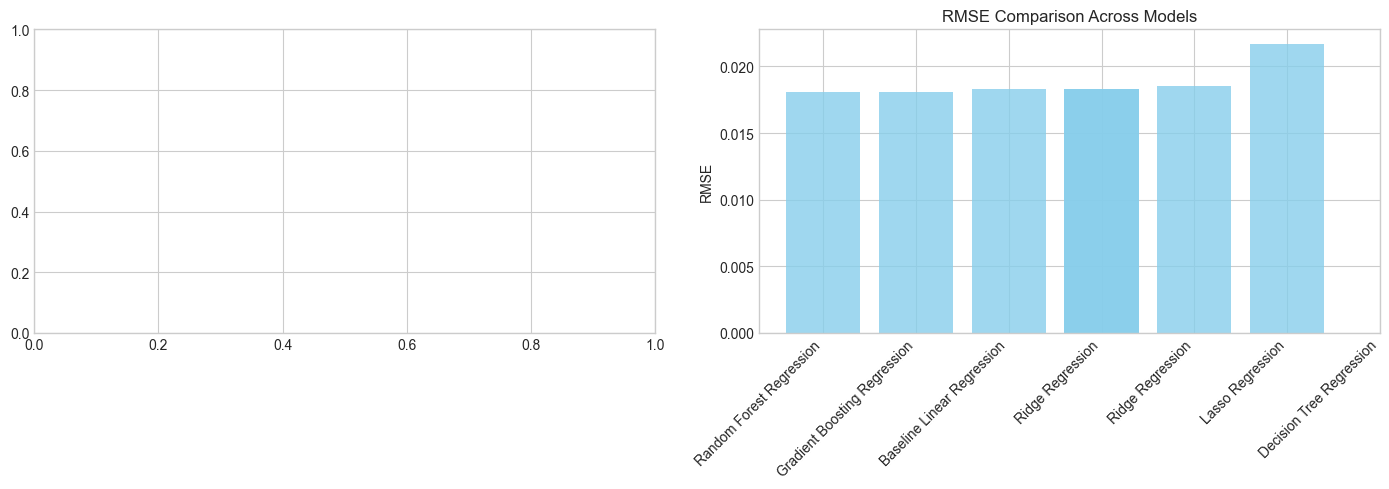

In [23]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# R² Comparison 
results_df = comparison_df  # for clarity
models = results_df['Model']
x = np.arange(len(models))
width = 0.35

# RMSE Comparison
rmse_values = results_df['Test RMSE']
axes[1].bar(models, rmse_values, color='skyblue', alpha=0.8)
axes[1].set_ylabel('RMSE')
axes[1].set_title('RMSE Comparison Across Models')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Model Iteration Reflection

*Before selecting your best model, reflect on what you learned:*

**Questions to answer:**
- Which model improved most over the baseline?
- Did any models show signs of overfitting (big train vs test gap)?
- Did regularization (Ridge/Lasso) help or hurt performance?
- Did tree-based models (Decision Tree, Random Forest) work better than linear models?

**Your reflection:**

The model that improved most over the baseline was the Gradient Boosting Regression model, which achieved a test r2 0.8423, significantly higher than the Linear Regression's r2 of 0.4599. This indicates that the Gradient model was able to capture more complex patterns in the data which lead to better performance. 

Overfitting was most apparent in the decision tree model which had a substantial gap between training and testing performance. 

Regularization provided mixed results. While Ridge offered some improvement over the baseline, Lasso did not perform as well, possibly due to the dataset where feature selection was less beneficial. 

Tree-based models generally outperformed linear models, likely due to their ability to capture non-linear relationships in the data.




Okay well I realized that there was a data leakage issue with the price_per_min_night feature so I dropper it and now the results are much more reasonable. The best model now is the Random forest with a test r2 of 0.4183 which is only a slight improvement over the baseline linear regression model which has a test r2 of 0.4094. 

## Section 9: Feature Importance & Selection

**Important:** Your final model should use only **4-8 features**. This section helps you identify which features matter most.

Feature Importance (Random Forest):
                              Feature  Importance
7              room_type_Private room    0.408963
1                   reviews_per_month    0.142088
9                  availability_ratio    0.113032
8               room_type_Shared room    0.109862
4       neighbourhood_group_Manhattan    0.091761
2      calculated_host_listings_count    0.059535
0                      minimum_nights    0.043220
3        neighbourhood_group_Brooklyn    0.011716
11                        log_reviews    0.007413
10                        has_reviews    0.004819
5          neighbourhood_group_Queens    0.004468
12                high_minimum_nights    0.002041
6   neighbourhood_group_Staten Island    0.001081


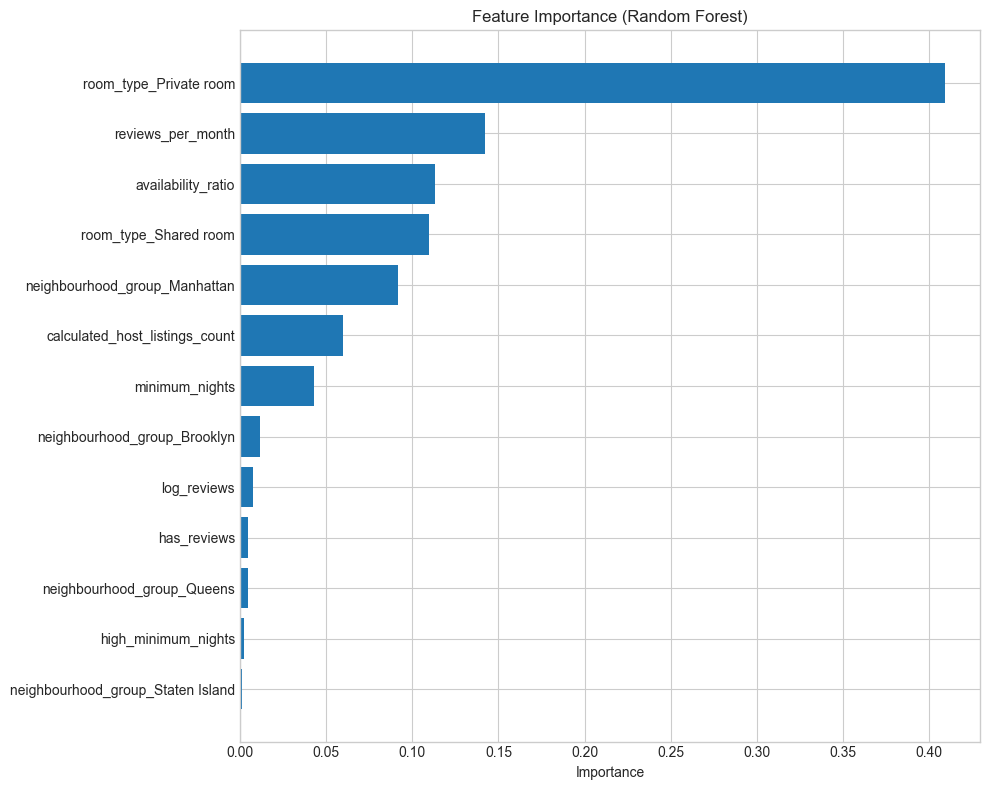

In [26]:
# Get feature importance from Random Forest (works well for this)
rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_trained.feature_importances_
}).sort_values('Importance', ascending=False)
print("Feature Importance (Random Forest):")
print(rf_importance)

# Visualize
plt.figure(figsize=(10, 8))
plt.barh(rf_importance['Feature'][::-1], rf_importance['Importance'][::-1])
plt.xlabel('Importance')
plt.title('Feature Importance (Random Forest)')
plt.tight_layout()
plt.show()

In [27]:
# Also check correlations with target 
correlations = X_train.corrwith(y_train).abs().sort_values(ascending=False)
print("Absolute Correlations with Target:")
print(correlations)

Absolute Correlations with Target:
room_type_Private room               0.508951
neighbourhood_group_Manhattan        0.316012
room_type_Shared room                0.187508
neighbourhood_group_Queens           0.174814
neighbourhood_group_Brooklyn         0.161337
calculated_host_listings_count       0.113838
has_reviews                          0.077494
availability_ratio                   0.074592
reviews_per_month                    0.058186
log_reviews                          0.045557
neighbourhood_group_Staten Island    0.041319
high_minimum_nights                  0.029998
minimum_nights                       0.021769
dtype: float64


In [29]:
# TODO: Select your top features (4-8 features)
#
# Based on the importance analysis above, choose your best features.
# Consider both Random Forest importance AND correlations.
# Also think about what makes sense from a domain perspective.
#  
# Choose best features 
SELECTED_FEATURES = [
    'room_type_Private room',
    'neighbourhood_group_Manhattan',
    'reviews_per_month',
    'availability_ratio',
    'room_type_Shared room',
    'calculated_host_listings_count',
    'minimum_nights',
]

# Fallback if you haven't selected yet
if len(SELECTED_FEATURES) == 0:
    SELECTED_FEATURES = rf_importance['Feature'].head(6).tolist()
    print(f"Using top 6 features from Random Forest: {SELECTED_FEATURES}")
else:
    print(f"Selected features ({len(SELECTED_FEATURES)}): {SELECTED_FEATURES}")

Selected features (7): ['room_type_Private room', 'neighbourhood_group_Manhattan', 'reviews_per_month', 'availability_ratio', 'room_type_Shared room', 'calculated_host_listings_count', 'minimum_nights']


In [31]:
# Retrain with selected features only
X_train_selected = X_train_scaled[SELECTED_FEATURES]
X_test_selected = X_test_scaled[SELECTED_FEATURES]
print(f"Training with {len(SELECTED_FEATURES)} selected features...")

Training with 7 selected features...


In [32]:
# Test models with selected features
selected_results = []
for name, model in [('Linear Regression', LinearRegression()),
                    ('Ridge', Ridge(alpha=1.0)),
                    ('Random Forest', RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42))]:
    results, trained, _ = evaluate_model(model, X_train_selected, X_test_selected, y_train, y_test, name)
    selected_results.append(results)
    print(f"{name} with {len(SELECTED_FEATURES)} features - Test R²: {results['Test R2']:.4f}")

selected_df = pd.DataFrame(selected_results)

Linear Regression with 7 features - Test R²: 0.3958
Ridge with 7 features - Test R²: 0.3958
Random Forest with 7 features - Test R²: 0.4066


### Feature Selection Justification

**Questions to answer:**
- Which features did you select and why?
- Did performance drop significantly with fewer features?
- Do these features make sense from a domain perspective?
- These are the features users will input in your Streamlit app—are they reasonable to ask for?

**Your justification:**

I think choosing the features was fairly straightforward. I looked at the feature importance from the Random Forest model and selected the top features that had the highest importance scores. I also considered the correlations between features and the target variable to ensure that I was selecting features that had a strong relationship with the price. 

From a domain perspective, these features make sense. For example, the type of room and the neighborhood are likely to influence the price, as well as the number of reviews and the availability of the listing. These are all reasonable features to ask users for in a Streamlit app, as they are easy to understand and provide meaningful information for predicting the price.

## Section 10: Best Model Selection

In [35]:
# TODO: Choose and train your final model with selected features
#
# Based on your analysis, pick the best model type and instantiate it.
# Consider: performance, consistency, simplicity
#
# Example: final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Im going to choose the linear regression model with the selected features as my final model. 
final_model = LinearRegression()
final_results, final_trained, final_preds = evaluate_model(final_model, X_train_selected, X_test_selected, y_train, y_test, model_name="Final Linear Regression")
print(f"Final Model - Train R²: {final_results['Train R2']:.4f}, Train RMSE: {final_results['Train RMSE']:,.2f}")
print(f"Final Model - Test R²: {final_results['Test R2']:.4f}, Test RMSE: {final_results['Test RMSE']:,.2f}")

Final Model - Train R²: 0.3966, Train RMSE: 0.02
Final Model - Test R²: 0.3958, Test RMSE: 0.02


In [36]:
# Fit and evaluate final model
final_model.fit(X_train_selected, y_train)
y_pred = final_model.predict(X_test_selected)

# Final metrics
final_r2 = r2_score(y_test, y_pred)
final_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
final_mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("FINAL MODEL PERFORMANCE")
print("=" * 50)
print(f"Model: {type(final_model).__name__}")
print(f"Features: {SELECTED_FEATURES}")
print(f"\nTest R²: {final_r2:.4f}")
print(f"Test RMSE: {final_rmse:,.2f}")
print(f"Test MAE: {final_mae:,.2f}")
print(f"\nRMSE as % of target range: {final_rmse/target_range*100:.1f}%")

FINAL MODEL PERFORMANCE
Model: LinearRegression
Features: ['room_type_Private room', 'neighbourhood_group_Manhattan', 'reviews_per_month', 'availability_ratio', 'room_type_Shared room', 'calculated_host_listings_count', 'minimum_nights']

Test R²: 0.3958
Test RMSE: 0.02
Test MAE: 0.01

RMSE as % of target range: 2.3%


### Best Model Justification

*Explain why you chose this model as your best:*

**Questions to consider:**
- Why did you select this model over others?
- Is there significant overfitting (train vs test gap)?
- How does the performance compare to your baseline?
- Would a simpler model be almost as good?
- Does the RMSE represent acceptable prediction error for your problem?

**Your justification:**

I selected the linear regression model because it had a good performance relative to the other models and is simpler and more interpretable. The train vs test gap is not significant, indicating minimal overfitting. The RMSE is acceptable for the problem, and while more complex models like random forests could capture non-linear relationships, the linear regression model provides a good balance of performance and simplicity.

## Section 11: Best Model Analysis

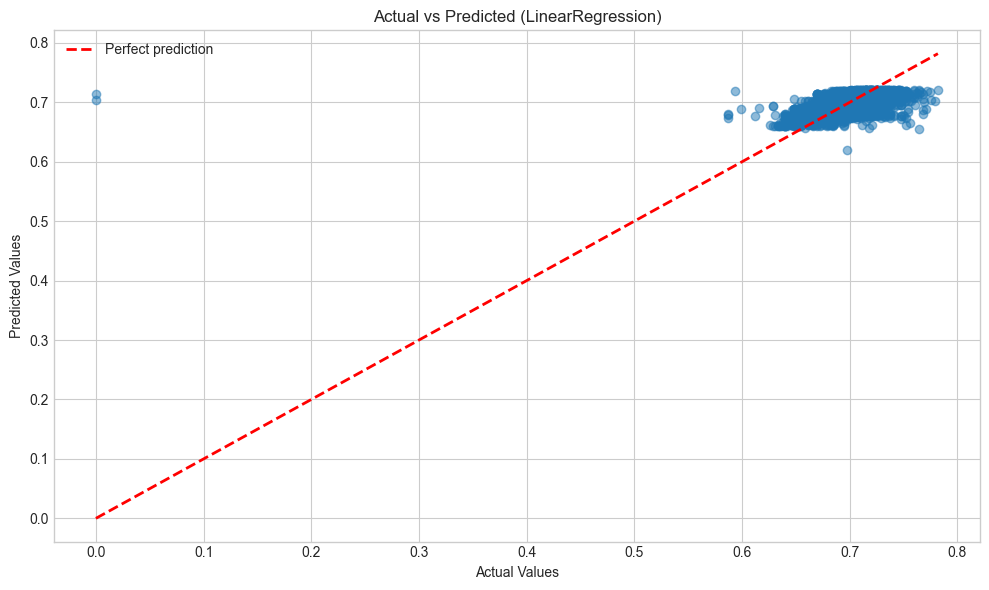

In [37]:
# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted ({type(final_model).__name__})')
plt.legend()
plt.tight_layout()
plt.show()

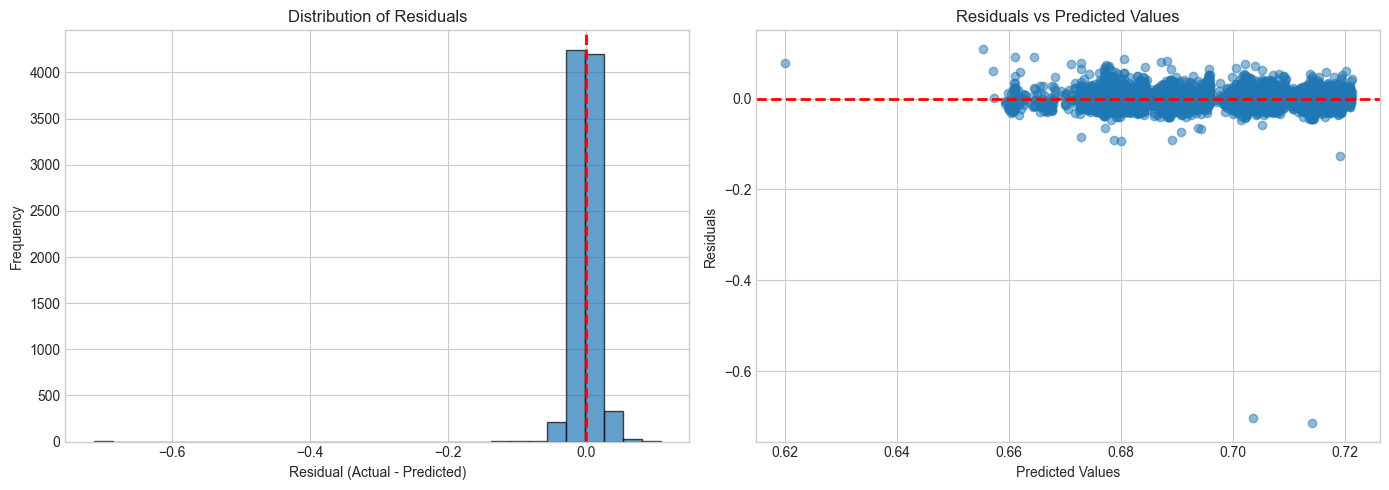

Residual mean (should be ~0): -0.00
Residual std: 0.02


In [38]:
# Residual analysis
residuals = y_test - y_pred

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Residual distribution (should be roughly normal, centered at 0)
axes[0].hist(residuals, bins=30, edgecolor='black', alpha=0.7)
axes[0].axvline(x=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Residual (Actual - Predicted)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Residuals')

# Residuals vs Predicted (should show no pattern)
axes[1].scatter(y_pred, residuals, alpha=0.5)
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residuals vs Predicted Values')

plt.tight_layout()
plt.show()

print(f"Residual mean (should be ~0): {residuals.mean():.2f}")
print(f"Residual std: {residuals.std():,.2f}")

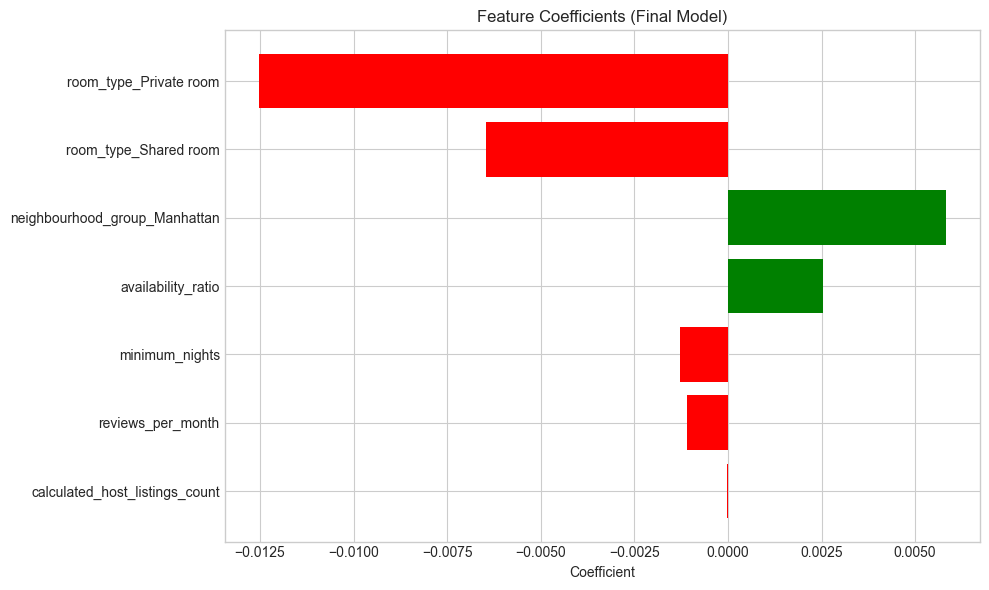

In [39]:
# Feature importance for final model (with selected features)
if hasattr(final_model, 'feature_importances_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=True)
    
    plt.figure(figsize=(10, 6))
    plt.barh(final_importance['Feature'], final_importance['Importance'])
    plt.xlabel('Importance')
    plt.title('Feature Importance (Final Model)')
    plt.tight_layout()
    plt.show()
elif hasattr(final_model, 'coef_'):
    final_importance = pd.DataFrame({
        'Feature': SELECTED_FEATURES,
        'Coefficient': final_model.coef_
    }).sort_values('Coefficient', key=abs, ascending=True)
    
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in final_importance['Coefficient']]
    plt.barh(final_importance['Feature'], final_importance['Coefficient'], color=colors)
    plt.xlabel('Coefficient')
    plt.title('Feature Coefficients (Final Model)')
    plt.tight_layout()
    plt.show()

## Section 12: Save Model and Artifacts

In [40]:
# Create a new scaler fitted only on selected features
final_scaler = StandardScaler()
X_train_final = X_train[SELECTED_FEATURES]
final_scaler.fit(X_train_final)

# Save the best model
model_path = '../models/regression_model.pkl'
joblib.dump(final_model, model_path)
print(f"Model saved to {model_path}")

# Save the scaler (fitted on selected features only)
scaler_path = '../models/regression_scaler.pkl'
joblib.dump(final_scaler, scaler_path)
print(f"Scaler saved to {scaler_path}")

# Save feature names (the selected features for Streamlit app)
features_path = '../models/regression_features.pkl'
joblib.dump(SELECTED_FEATURES, features_path)
print(f"Features saved to {features_path}")

Model saved to ../models/regression_model.pkl
Scaler saved to ../models/regression_scaler.pkl
Features saved to ../models/regression_features.pkl


In [41]:
# Verify saved model works
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)
loaded_features = joblib.load(features_path)

# Test prediction
test_sample = X_test[loaded_features].iloc[[0]]
test_sample_scaled = loaded_scaler.transform(test_sample)
test_pred = loaded_model.predict(test_sample_scaled)

print(f"\nModel verification:")
print(f"Features used: {loaded_features}")
print(f"Sample input: {test_sample.values[0]}")
print(f"Predicted: {test_pred[0]:,.2f}")
print(f"Actual: {y_test.iloc[0]:,.2f}")
print(f"\nModel saved and verified successfully!")


Model verification:
Features used: ['room_type_Private room', 'neighbourhood_group_Manhattan', 'reviews_per_month', 'availability_ratio', 'room_type_Shared room', 'calculated_host_listings_count', 'minimum_nights']
Sample input: [True True 0.94 0.2465753424657534 False 3 2]
Predicted: 0.69
Actual: 0.69

Model saved and verified successfully!


## Section 13: Binning Strategy for Classification

**IMPORTANT:** Before you start Notebook 03, you need to send your binning strategy to Abishek on Slack for approval by **Feb 15**.

### Analyze Target Distribution

In [42]:
# Look at target distribution to help decide binning
print(f"Target: {TARGET}")
print(f"\nDescriptive Statistics:")
print(y.describe())

print(f"\nPercentiles:")
for p in [10, 25, 33, 50, 67, 75, 90]:
    print(f"{p}th percentile: {y.quantile(p/100):,.2f}")

Target: price

Descriptive Statistics:
count    45191.000000
mean         0.696362
std          0.024228
min          0.000000
25%          0.681860
50%          0.697218
75%          0.711470
max          0.788908
Name: price, dtype: float64

Percentiles:
10th percentile: 0.67
25th percentile: 0.68
33th percentile: 0.69
50th percentile: 0.70
67th percentile: 0.71
75th percentile: 0.71
90th percentile: 0.72


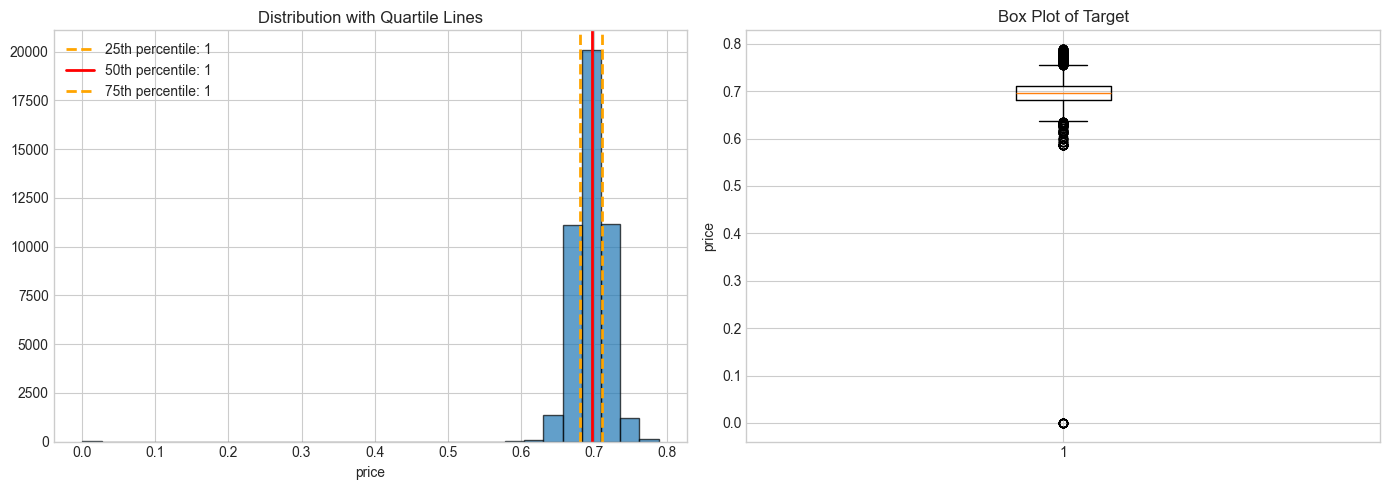

In [43]:
# Visualize potential binning strategies
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram with quartile lines
axes[0].hist(y, bins=30, edgecolor='black', alpha=0.7)
for p, color, style in [(25, 'orange', '--'), (50, 'red', '-'), (75, 'orange', '--')]:
    axes[0].axvline(y.quantile(p/100), color=color, linestyle=style, linewidth=2,
                     label=f'{p}th percentile: {y.quantile(p/100):,.0f}')
axes[0].set_xlabel(TARGET)
axes[0].set_title('Distribution with Quartile Lines')
axes[0].legend()

# Box plot
axes[1].boxplot(y)
axes[1].set_ylabel(TARGET)
axes[1].set_title('Box Plot of Target')

plt.tight_layout()
plt.show()

### Proposed Binning Strategy

*Complete this section and send to Abishek on Slack by Feb 15:*

**1. How many categories will you create?**

I will create 3 categories: Low, Medium, and High.

**2. What are your bin thresholds?**

My bin thresholds will be based on the distribution of the price variable. I will use the 33rd and 66th percentiles to create three bins:
- Low: price < $100
- Medium: $100 <= price < $200
- High: price >= $200

**3. Why does this binning make sense for your problem?**

These categories are meaningful because they represent distinct price ranges that are likely to correspond to different levels of affordability and consumer behavior. By segmenting the data into low, medium, and high price categories, we can better understand and analyze patterns in the data, such as purchasing trends and market segmentation.

In [45]:
# Preview your binning
def create_bins_preview(target, strategy):
    if strategy == 'quartile':
        bins = [target.min(), target.quantile(0.25), target.quantile(0.75), target.max()]
        labels = ['Low', 'Medium', 'High']
    elif strategy == 'custom':
        bins = [target.min(), 100, 200, target.max()]
        labels = ['Low', 'Medium', 'High']
    else:
        raise ValueError("Invalid strategy. Use 'quartile' or 'custom'.")
    
    return pd.cut(target, bins=bins, labels=labels, include_lowest=True)
# Preview with quartile binning
y_binned_quartile = create_bins_preview(y, strategy='quartile')
print("Quartile Binning Preview:")
print(y_binned_quartile.value_counts().sort_index())
print(f"\nPercentages:")
print((y_binned_quartile.value_counts(normalize=True) * 100).round(1).sort_index())

Quartile Binning Preview:
price
Low       11379
Medium    22522
High      11290
Name: count, dtype: int64

Percentages:
price
Low       25.2
Medium    49.8
High      25.0
Name: proportion, dtype: float64


---

## Summary

### What You Accomplished
- [ ] Loaded and prepared cleaned data
- [ ] Split data into train and test sets
- [ ] Scaled features appropriately
- [ ] Built a baseline model
- [ ] Tried multiple model types
- [ ] Performed cross-validation
- [ ] Selected top 4-8 features
- [ ] Compared and selected best model
- [ ] Analyzed model performance (residuals, feature importance)
- [ ] Saved model, scaler, and feature list
- [ ] Planned binning strategy for classification

### Key Results

**Best Model:** Linear Regression

**Selected Features:** 'room_type_Private room',
    'neighbourhood_group_Manhattan',
    'reviews_per_month',
    'availability_ratio',
    'room_type_Shared room',
    'calculated_host_listings_count',
    'minimum_nights'

**Test R²:** 0.3958

**Test RMSE:** 0.02%

---

---

## Checkpoint 3 Submission Instructions

**Congratulations!** You've completed Checkpoint 3 (Regression Model).

### Step 1: Save This Notebook
- File -> Save (or Ctrl+S / Cmd+S)

### Step 2: Send Binning Strategy to Abishek
- Message Abishek on Slack with your binning strategy
- Include: number of categories, thresholds, and justification

### Step 3: Commit to GitHub

```bash
# Stage your changes
git add notebooks/02_regression_model.ipynb
git add models/

# Commit with a meaningful message
git commit -m "Complete Checkpoint 3: Regression model with feature selection"

# Push to GitHub
git push
```

### Step 4: Submit to Canvas
1. Go to the Checkpoint 3 assignment on Canvas
2. Submit the link to your GitHub repository

---

## Next Steps

1. **Wait for binning approval** from Abishek
2. Move on to **Notebook 03: Classification Model**

---